# Perceptron Networks
    This notebook is an attempt to reproduce three models of perceptron seen during the ANN bachelor subject.
0. [Sum Function](#0-sum-function)
1. [Single Layer Perceptron](#1-single-layer-perceptron)
2. [Single Layer and Training](#2-single-layer-with-training)
3. Multi Layer

In [1]:
# Setup

## Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
rd = np.random


## 0. Sum Function
    This Summation function will be used for the three models of perceptron used in this notebook.

In [2]:
# Define Summation Function
def sum_function(inputs, weights) -> float:
    '''
    Sum of the product of the inputs by the weights
    + w[i] * x[i]
    + w[i+1] * x[i+1] 
    + ... + w[n] * x[n]

    @return float: The Net Input / Pre-Activation result
    '''
    net_input: float = inputs.dot(weights)
    return net_input

## 1. Single Layer perceptron
    This SLP will use a standard step function as its activation.

In [3]:
# Define the Step Function
def step_function(net_input) -> int:
    '''
    1, if net_input >= 1
    0, if net_input < 1
    
    @return int: The Activation result
    '''
    activation: int = int(net_input >= 1)
    return activation

In [4]:
# Setup the case scenario #1
case  = np.array([-1,  7, 5])
weights = np.array([.8, .1, 0])

# Run the Perceptron
net_input: float = sum_function(case, weights)
activation: int  = step_function(net_input)

print(f'Summation: {net_input}\nStep Func: {activation}')

Summation: -0.1
Step Func: 0


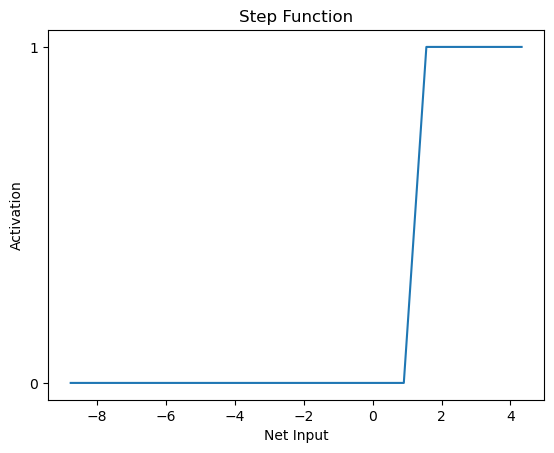

In [5]:
# Net Input VS. Activation 
case = []
weights = []
net_input = []
activation = []

for j in range(10):
    seed1, seed2 = 42 + j, 73 + j
    rd.seed(seed1)
    case.append(rd.randint(-10, 10, 3))
    rd.seed(seed2)
    weights.append(np.round(rd.rand(3), 4))

    # Run the Perceptron
    net_input.append(sum_function(case[j], weights[j]))
    activation.append(step_function(net_input[j]))


df1 = pd.DataFrame({
    'Inputs': case, 
    'Weights': weights, 
    'Net Input': net_input, 
    'Activation': activation
})
# display(df1)

sns.lineplot(x='Net Input', y='Activation', data=df1)
plt.title('Step Function')
plt.yticks(np.arange(0, 2, step=1))

plt.show()

## 2. Single layer with Training
    Now an ANN to predict logic gate (AND, NAND, OR, NOR) outputs based on two inputs

### AND Gate: two inputs for each output

|    A    |    B    | Output |
|---------|---------|--------|
|    0    |    0    |    0   |
|    0    |    1    |    0   |
|    1    |    0    |    0   |
|    1    |    1    |    1   |

In [6]:
# Setup the case scenario #2
cases = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

gates = {
     'AND': np.array([0, 0, 0, 1]),
    'NAND': np.array([1, 1, 1, 0]),
      'OR': np.array([0, 1, 1, 1]),
     'NOR': np.array([1, 0, 0, 0]),
}

In [7]:
class SingleLayerPerceptron():

    # Constructor
    def __init__(
            self,
            weights = np.array(np.random.rand(2)),
            learn_rate = 0.1,
            ):
        '''
        Initializes the weights randomly as optional,
        and sets the learning rate to 0.1 if not specified 
        '''
        self.weights: np.array = weights
        self.learn_rate: float = learn_rate

    # Define the complete activation function
    def get_output(self, inputs, weights):
        '''
        Computes the output of a perceptron using a step function.

        Args:
            inputs (list of float): The input values to the perceptron.
            weights (list of float): The weights associated with the inputs.

        Returns:
            int: The output of the perceptron after applying the step function.
        '''
        net_input = sum_function(inputs, weights)
        return step_function(net_input)

    # Define the weight update function
    # TODO implement 
    def learn(self, weights, inputs, current_error):
        '''
        Updates a given weight.
        
        Args:
            inputs (list of list of float): The input values to the perceptron.
            weights (list of float): The weights associated with the inputs.
        '''

        for j in range(len(weights)):
            '''
            j loops over the 2 weights and their respective inputs
            Updates the weights using the formula
            '''
            weights[j] += (self.learn_rate * inputs[j] * current_error)

    # Define the training function
    def train(self, gate):
        epoch            = 0
        total_error      = 1
        expected_outputs = gates[gate]
        
        while(total_error != 0): # STOP CONDITION -----------------------------------------------------
            '''
            Checks for stop condition
            If != 0, reset total_error and continue training
            '''
            
            total_error = 0 # Reset

            # EACH CASE (INPUT PAIR) len=4____________________________________________________________________
            for i, case in enumerate(cases):
                '''
                i loops over the 4 input_cases and their respective expected_outputs
                Gets the actual output for each input case
                Calculates the current_error for each input case
                Increments the total_error
                '''

                current_output = self.get_output(np.asarray(case), weights)
                current_error  = abs(expected_outputs[i] - current_output)
                total_error    += current_error

                self.learn(weights, case, current_error)
            
            epoch += 1

        # Training completed _________________________________________________________________________
        print(f'''>>> TRAINING COMPLETE: {epoch} epochs <<<
              
    weights = [0: {weights[0]}, 1: {weights[1]}]

    Gate: {gate}
    [1] = 0 0 -> {self.get_output(cases[0], weights)}
    [2] = 0 1 -> {self.get_output(cases[1], weights)}
    [3] = 1 0 -> {self.get_output(cases[2], weights)}
    [4] = 1 1 -> {self.get_output(cases[3], weights)}''')


In [8]:
weights = np.array([0.0, 0.0])
slp_and = SingleLayerPerceptron(weights, 0.1)
slp_and.train('AND')

>>> TRAINING COMPLETE: 6 epochs <<<
              
    weights = [0: 0.5, 1: 0.5]

    Gate: AND
    [1] = 0 0 -> 0
    [2] = 0 1 -> 0
    [3] = 1 0 -> 0
    [4] = 1 1 -> 1


In [9]:
weights = np.array([0.0, 0.0])
slp_or = SingleLayerPerceptron(weights, learn_rate=.1)
slp_or.train('OR')

>>> TRAINING COMPLETE: 10 epochs <<<
              
    weights = [0: 1.0999999999999999, 1: 1.0999999999999999]

    Gate: OR
    [1] = 0 0 -> 0
    [2] = 0 1 -> 1
    [3] = 1 0 -> 1
    [4] = 1 1 -> 1


In [10]:
# WONT STOP BECAUSE OF STOP CONDITION
# train('NAND') - Keeps increasing weights
# train('NOR')  - Never updates weights

## 3. Multi-layer perceptron

In [11]:
# TODO MLP